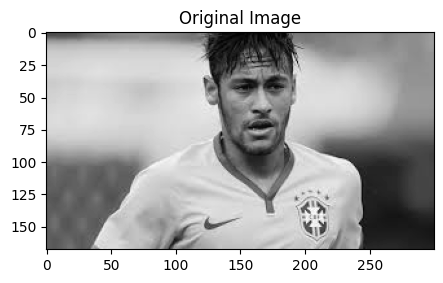

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Load image and convert to grayscale ---
image_path = r"C:\\Users\\BALASURYA B\\Downloads\\download (1).jpeg"
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Image not loaded. Check the file path!")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rows, cols = gray.shape

# Function to show image (with tick values, no axis labels like "x-axis", "y-axis")
def show_image(img, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.xlabel("")  # remove x-axis label text
    plt.ylabel("")  # remove y-axis label text
    plt.show()

# Show original first
show_image(gray, "Original Image")


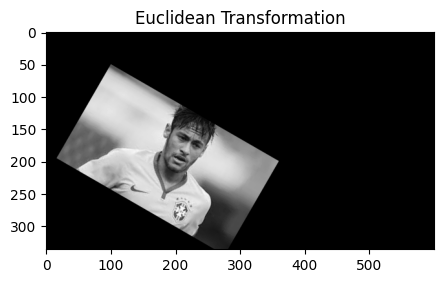

In [15]:
# 1. Euclidean (rotation + translation)
theta = np.deg2rad(30)
tx, ty = 100, 50

euclidean_matrix = np.array([
    [np.cos(theta), -np.sin(theta), tx],
    [np.sin(theta),  np.cos(theta), ty]
], dtype=np.float32)

euclidean_img = cv2.warpAffine(gray, euclidean_matrix, (cols*2, rows*2))
show_image(euclidean_img, "Euclidean Transformation")


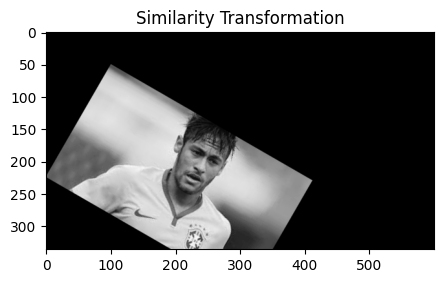

In [16]:
# 2. Similarity (scale + rotation + translation)
scale = 1.2
similarity_matrix = np.array([
    [scale*np.cos(theta), -scale*np.sin(theta), tx],
    [scale*np.sin(theta),  scale*np.cos(theta), ty]
], dtype=np.float32)

similarity_img = cv2.warpAffine(gray, similarity_matrix, (cols*2, rows*2))
show_image(similarity_img, "Similarity Transformation")


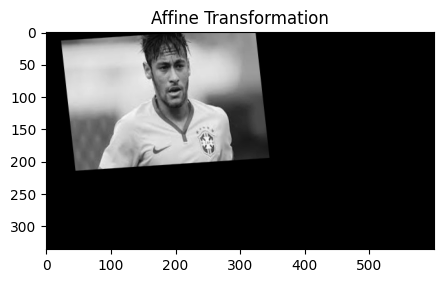

In [17]:
# 3. Affine Transformation
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[80, 70], [230, 60], [100, 250]])

affine_matrix = cv2.getAffineTransform(pts1, pts2)
affine_img = cv2.warpAffine(gray, affine_matrix, (cols*2, rows*2))
show_image(affine_img, "Affine Transformation")


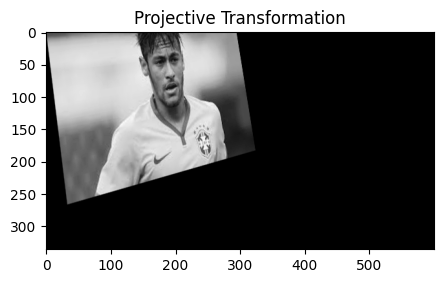

In [18]:
# 4. Projective (Perspective) Transformation
pts1 = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])
pts2 = np.float32([[70, 70], [220, 50], [100, 300], [250, 250]])

projective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
projective_img = cv2.warpPerspective(gray, projective_matrix, (cols*2, rows*2))
show_image(projective_img, "Projective Transformation")
